## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.shape

(1000, 21)

In [4]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [5]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [7]:
# количественные: duration, amount, age

# категориальные: status, credit_history, purpose, savings, personal_status_sex,
#                 other_debtors, property, other_installment_plans, housing, job
data_encoded = data.copy()
data_encoded = pd.get_dummies(data_encoded, columns=['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 
                                     'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'])

# бинарные: telephone, foreign_worker, credit_risk
data_encoded = pd.get_dummies(data_encoded, columns=['telephone', 'foreign_worker', 'credit_risk'], drop_first=True)

# порядковые: employment_duration, people_liable, installment_rate, present_residence, number_credits
employment_duration_map = {'< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, 'unemployed': 4, '>= 7 yrs': 5}
data_encoded['employment_duration_mapped'] = data_encoded['employment_duration'].map(employment_duration_map)

people_liable_map = {'0 to 2': 1, '3 or more': 2}
data_encoded['people_liable_mapped'] = data_encoded['people_liable'].map(people_liable_map)

installment_rate_map = {'< 20': 1, '25 <= ... < 35': 2, '20 <= ... < 25': 3, '>= 35': 4}
data_encoded['installment_rate_mapped'] = data_encoded['installment_rate'].map(installment_rate_map)

present_residence_map = {'< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
data_encoded['present_residence_mapped'] = data_encoded['present_residence'].map(present_residence_map)

number_credits_map = {'1': 1, '2-3': 2, '4-5': 3, '>= 6': 4}
data_encoded['number_credits_mapped'] = data_encoded['number_credits'].map(number_credits_map)

data_encoded = data_encoded.drop(columns=['employment_duration', 'people_liable', 'installment_rate', 'present_residence', 'number_credits'])
data_encoded

,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,...,job_unemployed/unskilled - non-resident,job_unskilled - resident,telephone_yes (under customer name),foreign_worker_yes,credit_risk_good,employment_duration_mapped,people_liable_mapped,installment_rate_mapped,present_residence_mapped,number_credits_mapped
0,18,1049,21,False,False,False,True,True,False,False,...,False,False,False,False,True,1,1,1,4,1
1,9,2799,36,False,False,False,True,True,False,False,...,False,False,False,False,True,2,2,2,2,2
2,12,841,23,True,False,False,False,False,False,False,...,False,True,False,False,True,3,1,2,4,1
3,12,2122,39,False,False,False,True,True,False,False,...,False,True,False,True,True,2,2,3,2,2
4,12,2171,38,False,False,False,True,True,False,False,...,False,True,False,True,True,2,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,False,False,False,True,False,False,False,...,False,True,False,False,False,2,2,2,4,1
996,24,2303,45,False,False,False,True,False,False,False,...,False,False,False,False,False,5,1,1,1,1
997,21,12680,30,False,True,False,False,True,False,False,...,False,False,True,False,False,5,1,1,4,1
998,12,6468,52,True,False,False,False,False,False,False,...,False,False,True,False,False,4,1,2,1,1


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
# data.loc[:, ['purpose', 'amount']].groupby(['purpose']).mean()
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
lt_30_yo_clients = data.loc[data['age'] < 30, ['housing', 'age']]
lt_30_yo_clients_rent = lt_30_yo_clients.loc[lt_30_yo_clients['housing'] == 'rent']
print(f'{lt_30_yo_clients_rent.count().iloc[0] / lt_30_yo_clients.count().iloc[0] * 100:.0f}%')

67%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
foreign_workers = data_encoded[(data_encoded['foreign_worker_yes'] == True) & 
                               (data_encoded['number_credits_mapped'] >= 3)]['number_credits_mapped']
foreign_workers.count()

1

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

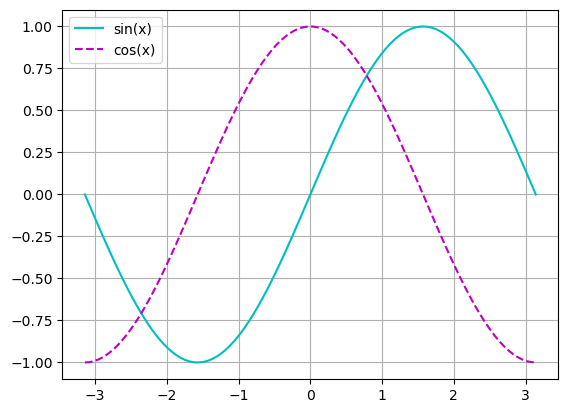

In [12]:
x = np.linspace(-np.pi, np.pi, num=100)

fig, ax = plt.subplots()
ax.grid(True)

ax.plot(x, np.sin(x), color='c')
ax.plot(x, np.cos(x), color='m', linestyle='--')
ax.legend(['sin(x)', 'cos(x)'])

plt.show()

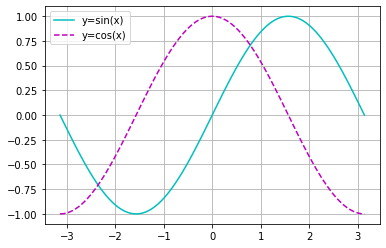

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [13]:
bar_data = {'good': {}, 'bad': {}}
bar_data['good']['no checking account'] = data_encoded[data_encoded['credit_risk_good']]['status_no checking account'].sum() 
bar_data['good'][' < 0 DM'] = data_encoded[data_encoded['credit_risk_good']]['status_... < 0 DM'].sum() 
bar_data['good']['0<= ... < 200 DM'] = data_encoded[data_encoded['credit_risk_good']]['status_0<= ... < 200 DM'].sum() 
bar_data['good']['>= 200 DM / salary for at least 1 year'] = data_encoded[data_encoded['credit_risk_good']]['status_... >= 200 DM / salary for at least 1 year'].sum() 

bar_data['bad']['no checking account'] = data_encoded[~data_encoded['credit_risk_good']]['status_no checking account'].sum()
bar_data['bad'][' < 0 DM'] = data_encoded[~data_encoded['credit_risk_good']]['status_... < 0 DM'].sum() 
bar_data['bad']['0<= ... < 200 DM'] = data_encoded[~data_encoded['credit_risk_good']]['status_0<= ... < 200 DM'].sum() 
bar_data['bad']['>= 200 DM / salary for at least 1 year'] = data_encoded[~data_encoded['credit_risk_good']]['status_... >= 200 DM / salary for at least 1 year'].sum() 

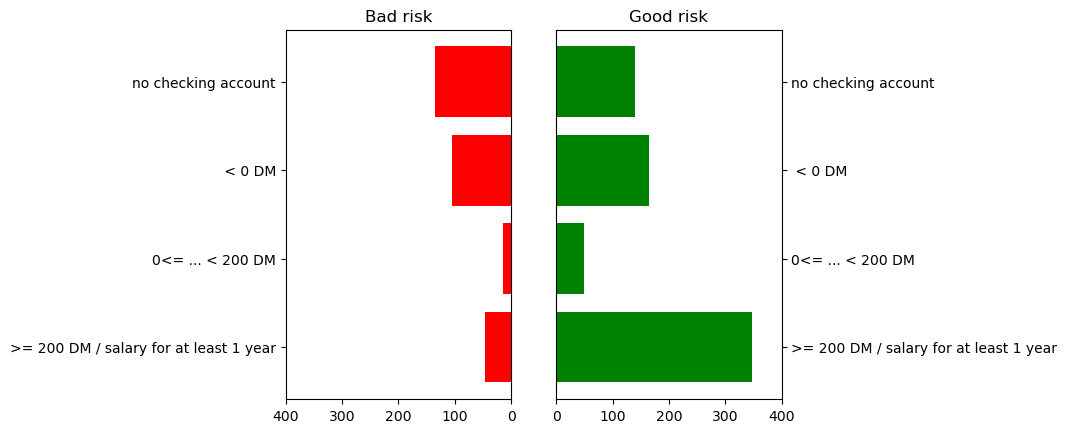

In [14]:
fig, ax = plt.subplots(1, 2)
y_pos = np.arange(len(bar_data['good'].keys()))

ax[0].barh(y_pos, bar_data['bad'].values(), color='r')
ax[0].set_xlim([0, 400])
ax[0].set_yticks(y_pos, labels=bar_data['bad'].keys())
ax[0].invert_xaxis() 
ax[0].invert_yaxis() 
ax[0].set_title('Bad risk')

ax[1].barh(y_pos, bar_data['good'].values(), color='g')
ax[1].set_xlim([0, 400])
ax[1].yaxis.tick_right()
ax[1].set_yticks(y_pos, labels=bar_data['good'].keys())
ax[1].invert_yaxis() 
ax[1].set_title('Good risk')

plt.show()

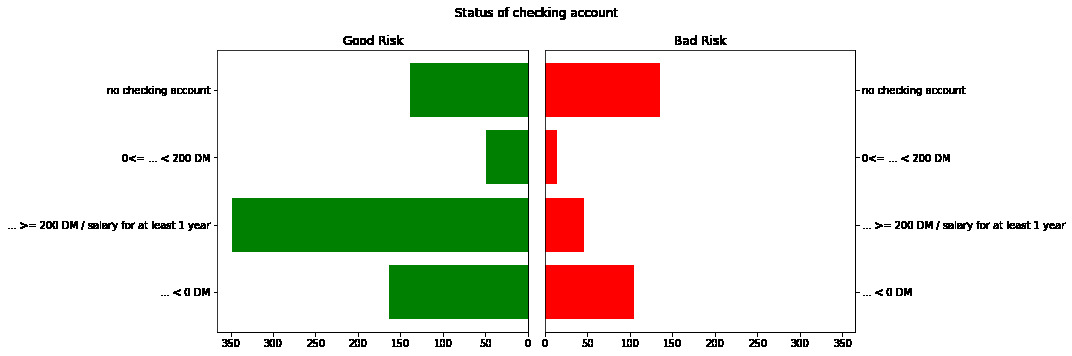

### Задание 8  (0.5 балла)

In [15]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [16]:
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


In [17]:
data['savings'].unique(), data['credit_risk'].unique()
data_encoded['savings_unknown/no savings account']

0       True
1       True
2      False
3       True
4       True
       ...  
995     True
996     True
997    False
998    False
999    False
Name: savings_unknown/no savings account, Length: 1000, dtype: bool

In [18]:
from itertools import product
def get_bar_df_row(savings: str, credit_risk_hue: str) -> list:
    credit_risk_mask = data_encoded['credit_risk_good'] if credit_risk_hue == 'good' else ~data_encoded['credit_risk_good']
    return [savings, credit_risk_hue, data_encoded[credit_risk_mask][f'savings_{savings}'].sum()]

bar_df = pd.DataFrame(columns=['savings', 'credit_risk_hue', 'credit_risk_value'])

for credit_risk_hue, savings in product(data['credit_risk'].unique(), data['savings'].unique()):
    bar_df.loc[len(bar_df)] = get_bar_df_row(savings, credit_risk_hue)

bar_df

,savings,credit_risk_hue,credit_risk_value
0,unknown/no savings account,good,386
1,... < 100 DM,good,69
2,100 <= ... < 500 DM,good,52
3,... >= 1000 DM,good,151
4,500 <= ... < 1000 DM,good,42
5,unknown/no savings account,bad,217
6,... < 100 DM,bad,34
7,100 <= ... < 500 DM,bad,11
8,... >= 1000 DM,bad,32
9,500 <= ... < 1000 DM,bad,6


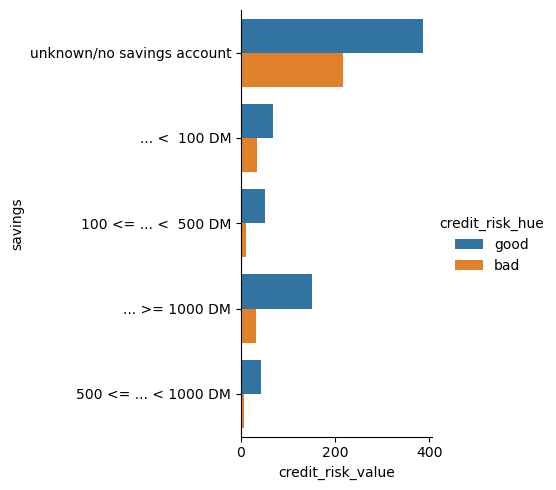

In [19]:
g = sns.catplot(
    data=bar_df, kind="bar",
    x="credit_risk_value", y="savings", hue="credit_risk_hue"
)

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

In [20]:
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


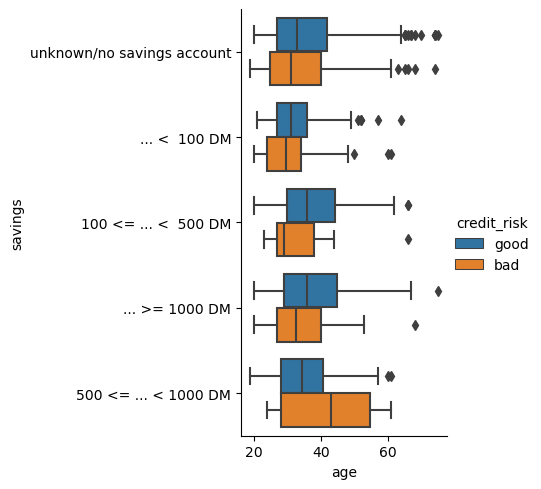

In [21]:
g = sns.catplot(data, x='age', y='savings', hue='credit_risk', kind='box')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

c:\Users\ilya\anaconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


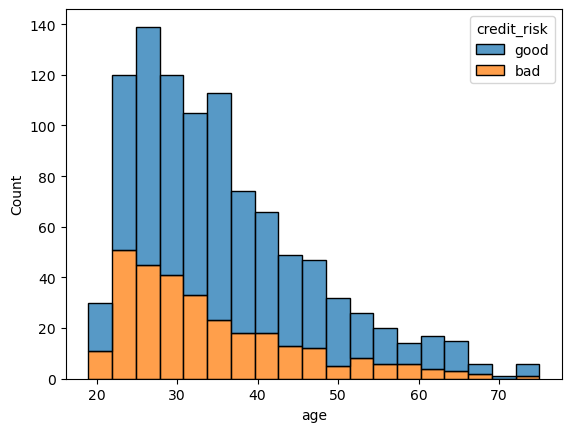

In [27]:
g = sns.histplot(data, x="age", hue="credit_risk", multiple="stack")

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

In [29]:
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good


<Axes: xlabel='duration', ylabel='amount'>

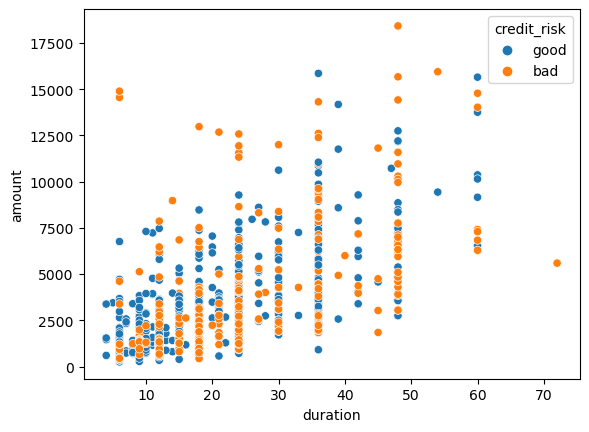

In [32]:
sns.scatterplot(data, x="duration", y="amount", hue="credit_risk")

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

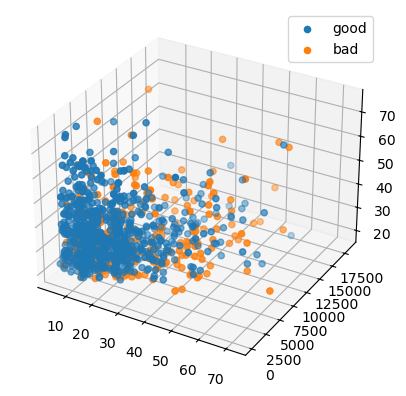

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cr in data['credit_risk'].unique():
    ax.scatter(
        data['duration'][data['credit_risk']==cr],
        data['amount'][data['credit_risk']==cr],
        data['age'][data['credit_risk']==cr],
        label=cr
    )

ax.legend()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

см. задание 2

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [42]:
def predict(Xtest: np.array) -> np.array:
    ...
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))
print(X)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given